# Исследование стартапов

- Автор: Логинов Павел Александрович
- Дата: 27.02.2025

## Введение

### Цели и задачи проекта

**Цель проекта**: проведение исследовательского анализа данных инвестиционного рынка для покупки, развития и последующей перепродажи перспективных стартапов

**Задачи проекта**:

- Изучить данные
- Провести преобработку данных
- Провести исследовательский анализ объединённых таблиц:
    - Провести корректное объединение данных
    - Проанализировать имеющиеся выбросы
    - Исследовать компании, которые были проданы за ноль или за один доллар
    - Выделить категории стартапов, которые характеризуются наибольшими типичными ценами и наибольшим разбросом цен за стартап
    - Изучить сколько раундов продержится стартап перед покупкой
- Сформулировать итоговый вывод и рекомендации

### Описание данных

Файл `/datasets/acquisition.csv` содержит информацию о покупках одними компаниями других компаний:

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

Файл `/datasets/company_and_rounds.csv` содержит информацию о компаниях и раундах финансирования:

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

Файл `/datasets/education.csv` содержит информацию об образовании сотрудника:

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Файл `/datasets/people.csv` содержит информацию о сотрудниках:

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

Файл `/datasets/degrees.csv` содержит информацию типе образования сотрудника:

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Файл `/datasets/fund.csv` содержит информацию о фондах:

- `id` — идентификатор фонда.
- `name` — название фонда.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

Файл `/datasets/investment.csv` содержит информацию о раундах инвестирования:

- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `fund_id` — идентификатор фонда.

### Содержимое проекта

1. Знакомство с данными: загрузка и первичная предобработка
    - 1.1. Вывод общей информации, исправление названия столбцов
    - 1.2. Смена типов и анализ пропусков
2. Предобработка данных, предварительное исследование
    - 2.1. Раунды финансирования по годам
    - 2.2. Люди и их образование
    - 2.3. Объединять или не объединять — вот в чём вопрос
    - 2.4. Проблемный датасет и причина возникновения пропусков
3. Исследовательский анализ объединённых таблиц
    - 3.1. Объединение данных
    - 3.2. Анализ выбросов
    - 3.3. Куплены забесплатно?
    - 3.4. Цены стартапов по категориям
    - 3.5. Сколько раундов продержится стартап перед покупкой
4. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


### 1.1. Вывод общей информации, исправление названия столбцов

Начнём с загрузки библиотек и датасетов `acquisition.csv`, `company_and_rounds.csv`, `education.csv`, `people.csv`, `degrees.csv`, `fund.csv` и `investment.csv`,   Будем использовать *pandas* и *numpy* и библиотеки визуализации данных *matplotlib* и *seaborn*, а также *phik* для построения матрицы корреляции. Данные датасетов сохраним в следующих переменных: `acquisition_df`, `company_and_rounds_df`, `education_df`, `people_df` `degrees_df`,  `fund_df` и `investment_df`.

In [1]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
from scipy.stats import iqr

# Загружаем библиотеки для визуализации данных

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгружаем данные в переменные
try:
    acquisition_df = pd.read_csv('C:/Users/Student/Desktop/acquisition.csv')
    company_and_rounds_df = pd.read_csv('C:/Users/Student/Desktop/company_and_rounds.csv')
    education_df = pd.read_csv('C:/Users/Student/Desktop/education.csv')
    people_df = pd.read_csv('C:/Users/Student/Desktop/people.csv')
    degrees_df = pd.read_csv('C:/Users/Student/Desktop/degrees.csv')
    fund_df = pd.read_csv('C:/Users/Student/Desktop/fund.csv')
    investment_df = pd.read_csv('C:/Users/Student/Desktop/investment.csv')
except:
    acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
    company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
    education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
    people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
    degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
    fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
    investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Познакомимся с данными датасета `acquisition.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран

acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выводим информацию о датафрейме

acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Теперь познакомимся с данными датасета `company_and_rounds.csv`.

In [5]:
# Выводим первые строки датафрейма на экран

company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме

company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Заметим, что в данном датафрейме содержится два столбца с практически одинаковым названием - `company ID` и `company id`. Данную проблему будет необходимо исправить на этапе преобработки данных, когда будет производиться более детальное преобразование этого датафрейма (`Шаг 2. Предобработка данных, предварительное исследование. 2.4. Проблемный датасет и причина возникновения пропусков`)

Теперь познакомимся с данными датасета `education.csv`.

In [7]:
# Выводим первые строки датафрейма на экран

education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [8]:
# Выводим информацию о датафрейме

education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Теперь познакомимся с данными датасета `people.csv`.

In [9]:
# Выводим первые строки датафрейма на экран

people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [10]:
# Выводим информацию о датафрейме

people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Теперь познакомимся с данными датасета `degrees.csv`.

In [11]:
# Выводим первые строки датафрейма на экран

degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [12]:
# Выводим информацию о датафрейме

degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Теперь познакомимся с данными датасета `fund.csv`.

In [13]:
# Выводим первые строки датафрейма на экран

fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [14]:
# Выводим информацию о датафрейме

fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Теперь познакомимся с данными датасета `investment.csv`.

In [15]:
# Выводим первые строки датафрейма на экран

investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [16]:
# Выводим информацию о датафрейме

investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Проверим названия столбцов на одинаковый стиль написания

In [17]:
print('Названия столбцов датафрейма acquisition_df:')
display(acquisition_df.columns)
print()
print('Названия столбцов датафрейма company_and_rounds_df:')
display(company_and_rounds_df.columns)
print()
print('Названия столбцов датафрейма education_df:')
display(education_df.columns)
print()
print('Названия столбцов датафрейма people_df:')
display(people_df.columns)
print()
print('Названия столбцов датафрейма degrees_df:')
display(degrees_df.columns)
print()
print('Названия столбцов датафрейма fund_df:')
display(fund_df.columns)
print()
print('Названия столбцов датафрейма investment_df:')
display(investment_df.columns)

Названия столбцов датафрейма acquisition_df:


Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')


Названия столбцов датафрейма company_and_rounds_df:


Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')


Названия столбцов датафрейма education_df:


Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')


Названия столбцов датафрейма people_df:


Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')


Названия столбцов датафрейма degrees_df:


Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')


Названия столбцов датафрейма fund_df:


Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')


Названия столбцов датафрейма investment_df:


Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

Названия столбцов имеют одинаковый стиль написания за исключением датафрейма `company_and_rounds_df`. Поэтому названия столбцов в данном датафрейме необходимо привести к стилю `snake case`. Для этого названия столбцов переведём в нижний регистр, а вместо пробелов добавим подчёркивания

In [18]:
# Приводим названия столбцов к стилю snake case и проверяем, что в исходном датафрейме названия столбцов измениилсь

company_and_rounds_df.columns = company_and_rounds_df.columns.str.lower()
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_')

print('Обновлённые названия столбцов датафрейма company_and_rounds_df:')
display(company_and_rounds_df.columns)
print()
display(company_and_rounds_df.head())

Обновлённые названия столбцов датафрейма company_and_rounds_df:


Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Названия столбцов датафрейма `company_and_rounds_df` к стилю `snake case` - приведены

Проверим некоторые категориальные данные на наличие дубликатов. Для этого выведем список из уникальных значений в данных столбцах

In [19]:
# Выводим список уникальных значений категориальных данных в датафрейме acquisition_df

print('Уникальные значения категориальных данных в датафрейме acquisition_df')
print()
unique_term_code = acquisition_df['term_code'].unique()
nunique_term_code = acquisition_df['term_code'].nunique()
print(f'Уникальные значения в столбце term_code: {unique_term_code}')
print(f'Количество уникальных значений в столбце term_code: {nunique_term_code}')
print()
unique_acquired_at = acquisition_df['acquired_at'].unique()
nunique_acquired_at = acquisition_df['acquired_at'].nunique()
print(f'Уникальные значения в столбце acquired_at: {unique_acquired_at}')
print(f'Количество уникальных значений в столбце acquired_at: {nunique_acquired_at}')

Уникальные значения категориальных данных в датафрейме acquisition_df

Уникальные значения в столбце term_code: [nan 'cash' 'stock' 'cash_and_stock']
Количество уникальных значений в столбце term_code: 3

Уникальные значения в столбце acquired_at: ['2007-05-30' '2007-07-01' '2007-05-01' ... '2013-12-11' '2013-08-31'
 '2013-12-12']
Количество уникальных значений в столбце acquired_at: 2627


In [20]:
# Выводим список уникальных значений категориальных данных в датафрейме company_and_rounds_df

print('Уникальные значения категориальных данных в датафрейме company_and_rounds_df')
print()
unique_name = company_and_rounds_df['name'].unique()
nunique_name = company_and_rounds_df['name'].nunique()
print(f'Уникальные значения в столбце name: {unique_name}')
print(f'Количество уникальных значений в столбце name: {nunique_name}')
print()
unique_category_code = company_and_rounds_df['category_code'].unique()
nunique_category_code = company_and_rounds_df['category_code'].nunique()
print(f'Уникальные значения в столбце category_code: {unique_category_code}')
print(f'Количество уникальных значений в столбце category_code: {nunique_category_code}')
print()
unique_status = company_and_rounds_df['status'].unique()
nunique_status = company_and_rounds_df['status'].nunique()
print(f'Уникальные значения в столбце status: {unique_status}')
print(f'Количество уникальных значений в столбце status: {nunique_status}')
print()
unique_domain = company_and_rounds_df['domain'].unique()
nunique_domain = company_and_rounds_df['domain'].nunique()
print(f'Уникальные значения в столбце domain: {unique_domain}')
print(f'Количество уникальных значений в столбце domain: {nunique_domain}')
print()
unique_network_username = company_and_rounds_df['network_username'].unique()
nunique_network_username = company_and_rounds_df['network_username'].nunique()
print(f'Уникальные значения в столбце network_username: {unique_network_username}')
print(f'Количество уникальных значений в столбце network_username: {nunique_network_username}')
print()
unique_milestones = company_and_rounds_df['milestones'].unique()
nunique_milestones = company_and_rounds_df['milestones'].nunique()
print(f'Уникальные значения в столбце milestones: {unique_milestones}')
print(f'Количество уникальных значений в столбце milestones: {nunique_milestones}')
print()
unique_funding_round_type = company_and_rounds_df['funding_round_type'].unique()
nunique_funding_round_type = company_and_rounds_df['funding_round_type'].nunique()
print(f'Уникальные значения в столбце funding_round_type: {unique_funding_round_type}')
print(f'Количество уникальных значений в столбце funding_round_type: {nunique_funding_round_type}')
print()
unique_is_first_round = company_and_rounds_df['is_first_round'].unique()
nunique_is_first_round = company_and_rounds_df['is_first_round'].nunique()
print(f'Уникальные значения в столбце is_first_round: {unique_is_first_round}')
print(f'Количество уникальных значений в столбце is_first_round: {nunique_is_first_round}')
print()
unique_is_last_round = company_and_rounds_df['is_last_round'].unique()
nunique_is_last_round = company_and_rounds_df['is_last_round'].nunique()
print(f'Уникальные значения в столбце is_last_round: {unique_is_last_round}')
print(f'Количество уникальных значений в столбце is_last_round: {nunique_is_last_round}')

Уникальные значения категориальных данных в датафрейме company_and_rounds_df

Уникальные значения в столбце name: ['Wetpaint' 'Flektor' 'There' ... 'Pphotonet' 'Photonet' nan]
Количество уникальных значений в столбце name: 196506

Уникальные значения в столбце category_code: ['web' 'games_video' 'network_hosting' 'advertising' 'cleantech' nan
 'enterprise' 'other' 'consulting' 'mobile' 'health' 'software'
 'analytics' 'finance' 'education' 'medical' 'manufacturing' 'biotech'
 'ecommerce' 'public_relations' 'hardware' 'search' 'news' 'government'
 'security' 'photo_video' 'travel' 'semiconductor' 'social' 'legal'
 'transportation' 'hospitality' 'sports' 'nonprofit' 'fashion' 'messaging'
 'music' 'automotive' 'design' 'real_estate' 'local' 'nanotech' 'pets']
Количество уникальных значений в столбце category_code: 42

Уникальные значения в столбце status: ['operating' 'acquired' 'closed' 'ipo' nan]
Количество уникальных значений в столбце status: 4

Уникальные значения в столбце domain: [

In [21]:
# Выводим список уникальных значений категориальных данных в датафрейме education_df

print('Уникальные значения категориальных данных в датафрейме education_df')
print()
unique_instituition = education_df['instituition'].unique()
nunique_instituition = education_df['instituition'].nunique()
print(f'Уникальные значения в столбце instituition: {unique_instituition}')
print(f'Количество уникальных значений в столбце instituition: {nunique_instituition}')
print()
unique_graduated_at = education_df['graduated_at'].unique()
nunique_graduated_at = education_df['graduated_at'].nunique()
print(f'Уникальные значения в столбце graduated_at: {unique_graduated_at}')
print(f'Количество уникальных значений в столбце graduated_at: {nunique_graduated_at}')

Уникальные значения категориальных данных в датафрейме education_df

Уникальные значения в столбце instituition: [nan 'Washington University, St. Louis' 'Boston University' ...
 'Auburn University, Auburn, Alabama'
 'Loyola University, New Orleans, Louisiana'
 'Rutgers University, Newark, New Jersey']
Количество уникальных значений в столбце instituition: 21067

Уникальные значения в столбце graduated_at: [nan '1990-01-01' '1992-01-01' '2006-01-01' '1988-01-01' '2002-01-01'
 '1997-01-01' '1989-01-01' '2008-01-01' '1993-01-01' '2007-01-01'
 '1999-01-01' '2004-01-01' '1996-01-01' '2005-01-01' '1995-01-01'
 '2000-01-01' '1998-01-01' '2003-01-01' '1994-01-01' '1986-01-01'
 '1985-01-01' '1975-01-01' '1982-01-01' '1979-01-01' '1980-01-01'
 '1984-01-01' '2001-01-01' '1976-01-01' '1978-01-01' '1970-01-01'
 '1983-01-01' '1949-01-01' '1987-01-01' '1991-01-01' '1974-01-01'
 '1981-01-01' '1977-01-01' '2009-01-01' '1965-01-01' '2011-01-01'
 '1969-01-01' '1973-01-01' '1924-01-01' '1956-01-01' '1968-

In [22]:
# Выводим список уникальных значений категориальных данных в датафрейме people_df

print('Уникальные значения категориальных данных в датафрейме people_df')
print()
unique_first_name = people_df['first_name'].unique()
nunique_first_name = people_df['first_name'].nunique()
print(f'Уникальные значения в столбце first_name: {unique_first_name}')
print(f'Количество уникальных значений в столбце first_name: {nunique_first_name}')
print()
unique_last_name = people_df['last_name'].unique()
nunique_last_name = people_df['last_name'].nunique()
print(f'Уникальные значения в столбце last_name: {unique_last_name}')
print(f'Количество уникальных значений в столбце last_name: {nunique_last_name}')
print()
unique_network_username1 = people_df['network_username'].unique()
nunique_network_username1 = people_df['network_username'].nunique()
print(f'Уникальные значения в столбце name: {unique_network_username1}')
print(f'Количество уникальных значений в столбце network_username: {nunique_network_username1}')

Уникальные значения категориальных данных в датафрейме people_df

Уникальные значения в столбце first_name: ['Mark' 'Peter' 'Dr. Steven' ... 'Ã\x89lie' 'Tanis' 'Dr. Ray']
Количество уникальных значений в столбце first_name: 28422

Уникальные значения в столбце last_name: ['Zuckerberg' 'Lester' 'E. Saunders' ... 'Manda' 'Gench' 'Tamberrino']
Количество уникальных значений в столбце last_name: 107772

Уникальные значения в столбце name: [nan 'jobsbostontech' 'fbroulette' ... 'itechsocialnet' 'socialnethubs'
 'esocialnetlike']
Количество уникальных значений в столбце network_username: 38421


In [23]:
# Выводим список уникальных значений категориальных данных в датафрейме degrees_df

print('Уникальные значения категориальных данных в датафрейме degrees_df')
print()
unique_degree_type = degrees_df['degree_type'].unique()
nunique_degree_type = degrees_df['degree_type'].nunique()
print(f'Уникальные значения в столбце degree_type: {unique_degree_type}')
print(f'Количество уникальных значений в столбце degree_type: {nunique_degree_type}')
print()
unique_subject = degrees_df['subject'].unique()
nunique_subject = degrees_df['subject'].nunique()
print(f'Уникальные значения в столбце subject: {unique_subject}')
print(f'Количество уникальных значений в столбце subject: {nunique_subject}')

Уникальные значения категориальных данных в датафрейме degrees_df

Уникальные значения в столбце degree_type: ['MBA' 'BA' 'MS' ... 'Master of Public Health' "Master's of Music"
 'bachelors']
Количество уникальных значений в столбце degree_type: 7148

Уникальные значения в столбце subject: [nan 'English, French' 'Mass Communication' ...
 'Executive Senior Management Program'
 "Bachelor's of Music, Composition, Studio Production"
 'Business/Managerial Economics - Political Science']
Количество уникальных значений в столбце subject: 20050


In [24]:
# Выводим список уникальных значений категориальных данных в датафрейме fund_df

print('Уникальные значения категориальных данных в датафрейме fund_df')
print()
unique_name1 = fund_df['name'].unique()
nunique_name1 = fund_df['name'].nunique()
print(f'Уникальные значения в столбце name: {unique_name1}')
print(f'Количество уникальных значений в столбце name: {nunique_name1}')
print()
unique_domain1 = fund_df['domain'].unique()
nunique_domain1 = fund_df['domain'].nunique()
print(f'Уникальные значения в столбце domain: {unique_domain1}')
print(f'Количество уникальных значений в столбце domain: {nunique_domain1}')
print()
unique_network_username2 = fund_df['network_username'].unique()
nunique_network_username2 = fund_df['network_username'].nunique()
print(f'Уникальные значения в столбце network_username: {unique_network_username2}')
print(f'Количество уникальных значений в столбце network_username: {nunique_network_username2}')
print()
unique_milestones = fund_df['milestones'].unique()
nunique_milestones = fund_df['milestones'].nunique()
print(f'Уникальные значения в столбце milestones: {unique_milestones}')
print(f'Количество уникальных значений в столбце milestones: {nunique_milestones}')

Уникальные значения категориальных данных в датафрейме fund_df

Уникальные значения в столбце name: [nan 'Greylock Partners' 'Mission Ventures' ... 'CalSTRS' 'Haystack'
 'fbFund']
Количество уникальных значений в столбце name: 11648

Уникальные значения в столбце domain: [nan 'greylock.com' 'missionventures.com' ... 'calstrs.com'
 'network.com::haystack_fund' 'developers.socialnet.com::fbfund.php']
Количество уникальных значений в столбце domain: 7231

Уникальные значения в столбце network_username: [nan 'greylockvc' 'imi_vc' ... 'CalSTRS' 'haystack_fund' 'fbFund']
Количество уникальных значений в столбце network_username: 2098

Уникальные значения в столбце milestones: [0 1 4 2 3 5 6 7]
Количество уникальных значений в столбце milestones: 8


В датафрейме `investment_df` содержатся лишь идентификаторы

Поскольку во многих столбцах огромное количество уникальных данных, есть вероятность наличия дубликатов, например, из-за разницы в регистрах. Поэтому приведём все значения данных столбцов к нижнему регистру и уберём пробелы в начале и в конце строки

In [25]:
# Приводим значения к нижнему регистру и убираем пробелы в начале и в конце строки

company_and_rounds_df[['name', 'category_code', 'domain', 'network_username']] = company_and_rounds_df[['name', 'category_code', 'domain', 'network_username']].apply(lambda x: x.str.lower())

company_and_rounds_df[['name', 'category_code', 'domain', 'network_username']] = company_and_rounds_df[['name', 'category_code', 'domain', 'network_username']].apply(lambda x: x.str.strip())

education_df['instituition'] = education_df['instituition'].str.lower()
education_df['instituition'] = education_df['instituition'].str.strip()

people_df[['first_name', 'last_name', 'network_username']] = people_df[['first_name', 'last_name', 'network_username']].apply(lambda x: x.str.lower())

people_df[['first_name', 'last_name', 'network_username']] = people_df[['first_name', 'last_name', 'network_username']].apply(lambda x: x.str.strip())

degrees_df[['degree_type', 'subject']] = degrees_df[['degree_type', 'subject']].apply(lambda x: x.str.lower())

degrees_df[['degree_type', 'subject']] = degrees_df[['degree_type', 'subject']].apply(lambda x: x.str.strip())

fund_df[['name', 'domain', 'network_username']] = fund_df[['name', 'domain', 'network_username']].apply(lambda x: x.str.lower())

fund_df[['name', 'domain', 'network_username']] = fund_df[['name', 'domain', 'network_username']].apply(lambda x: x.str.strip())

In [26]:
# Выводим количество уникальных значений и обработанных дубликатов после преобразований в датафрейме company_and_rounds_df

nunique_name_new = company_and_rounds_df['name'].nunique()
print(f'Количество уникальных значений в столбце name: {nunique_name_new}')
print(f'Обработано дубликатов: {nunique_name - nunique_name_new}')
print()
nunique_category_code_new = company_and_rounds_df['category_code'].nunique()
print(f'Количество уникальных значений в столбце category_code: {nunique_category_code_new}')
print(f'Обработано дубликатов: {nunique_category_code - nunique_category_code_new}')
print()
nunique_domain_new = company_and_rounds_df['domain'].nunique()
print(f'Количество уникальных значений в столбце domain: {nunique_domain_new}')
print(f'Обработано дубликатов: {nunique_domain - nunique_domain_new}')
print()
nunique_network_username_new = company_and_rounds_df['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username: {nunique_network_username_new}')
print(f'Обработано дубликатов: {nunique_network_username - nunique_network_username_new}')

Количество уникальных значений в столбце name: 196504
Обработано дубликатов: 2

Количество уникальных значений в столбце category_code: 42
Обработано дубликатов: 0

Количество уникальных значений в столбце domain: 125498
Обработано дубликатов: 0

Количество уникальных значений в столбце network_username: 79374
Обработано дубликатов: 197


In [27]:
# Выводим количество уникальных значений и обработанных дубликатов после преобразований в датафрейме education_df

nunique_instituition_new = education_df['instituition'].nunique()
print(f'Количество уникальных значений в столбце instituition: {nunique_instituition_new}')
print(f'Обработано дубликатов: {nunique_instituition - nunique_instituition_new}')

Количество уникальных значений в столбце instituition: 20531
Обработано дубликатов: 536


In [28]:
# Выводим количество уникальных значений и обработанных дубликатов после преобразований в датафрейме people_df

nunique_first_name_new = people_df['first_name'].nunique()
print(f'Количество уникальных значений в столбце first_name: {nunique_first_name_new}')
print(f'Обработано дубликатов: {nunique_first_name - nunique_first_name_new}')
print()
nunique_last_name_new = people_df['last_name'].nunique()
print(f'Количество уникальных значений в столбце last_name: {nunique_last_name_new}')
print(f'Обработано дубликатов: {nunique_last_name - nunique_last_name_new}')
print()
nunique_network_username1_new = people_df['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username: {nunique_network_username1_new}')
print(f'Обработано дубликатов: {nunique_network_username1 - nunique_network_username1_new}')

Количество уникальных значений в столбце first_name: 26718
Обработано дубликатов: 1704

Количество уникальных значений в столбце last_name: 105539
Обработано дубликатов: 2233

Количество уникальных значений в столбце network_username: 38384
Обработано дубликатов: 37


In [29]:
# Выводим количество уникальных значений и обработанных дубликатов после преобразований в датафрейме degrees_df

nunique_degree_type_new = degrees_df['degree_type'].nunique()
print(f'Количество уникальных значений в столбце degree_type: {nunique_degree_type_new}')
print(f'Обработано дубликатов: {nunique_degree_type - nunique_degree_type_new}')
print()
nunique_subject_new = degrees_df['subject'].nunique()
print(f'Количество уникальных значений в столбце subject: {nunique_subject_new}')
print(f'Обработано дубликатов: {nunique_subject - nunique_subject_new}')

Количество уникальных значений в столбце degree_type: 6743
Обработано дубликатов: 405

Количество уникальных значений в столбце subject: 19182
Обработано дубликатов: 868


In [30]:
# Выводим количество уникальных значений и обработанных дубликатов после преобразований в датафрейме fund_df

nunique_name1_new = fund_df['name'].nunique()
print(f'Количество уникальных значений в столбце name: {nunique_name1_new}')
print(f'Обработано дубликатов: {nunique_name1 - nunique_name1_new}')
print()
nunique_domain1_new = fund_df['domain'].nunique()
print(f'Количество уникальных значений в столбце domain: {nunique_domain1_new}')
print(f'Обработано дубликатов: {nunique_domain1 - nunique_domain1_new}')
print()
nunique_network_username2_new = fund_df['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username: {nunique_network_username2_new}')
print(f'Обработано дубликатов: {nunique_network_username2 - nunique_network_username2_new}')

Количество уникальных значений в столбце name: 11648
Обработано дубликатов: 0

Количество уникальных значений в столбце domain: 7231
Обработано дубликатов: 0

Количество уникальных значений в столбце network_username: 2091
Обработано дубликатов: 7


Можем заметить, что количество уникальных значений - уменьшилось, а значит, были обработаны неявные дубликаты

Теперь проверим полные дубликаты по всем датафреймам с помощью метода `duplicated().sum()`

In [31]:
# Проверим полные дубликаты по всем датафреймам  

full_duplicated_acquisition_df = acquisition_df.duplicated().sum()
print(f'Количество полных дубликатов в датафрейме acquisition_df: {full_duplicated_acquisition_df}')
print()
full_duplicated_company_and_rounds_df = company_and_rounds_df.duplicated().sum()
print(f'Количество полных дубликатов в датафрейме company_and_rounds_df: {full_duplicated_company_and_rounds_df}')
print()
full_duplicated_education_df = education_df.duplicated().sum()
print(f'Количество полных дубликатов в датафрейме education_df: {full_duplicated_education_df}')
print()
full_duplicated_people_df = people_df.duplicated().sum()
print(f'Количество полных дубликатов в датафрейме people_df: {full_duplicated_people_df}')
print()
full_duplicated_degrees_df = degrees_df.duplicated().sum()
print(f'Количество полных дубликатов в датафрейме degrees_df: {full_duplicated_degrees_df}')
print()
full_duplicated_fund_df = fund_df.duplicated().sum()
print(f'Количество полных дубликатов в датафрейме fund_df: {full_duplicated_fund_df}')
print()
full_duplicated_investment_df = investment_df.duplicated().sum()
print(f'Количество полных дубликатов в датафрейме investment_df: {full_duplicated_investment_df}')

Количество полных дубликатов в датафрейме acquisition_df: 0

Количество полных дубликатов в датафрейме company_and_rounds_df: 0

Количество полных дубликатов в датафрейме education_df: 0

Количество полных дубликатов в датафрейме people_df: 0

Количество полных дубликатов в датафрейме degrees_df: 0

Количество полных дубликатов в датафрейме fund_df: 0

Количество полных дубликатов в датафрейме investment_df: 0


Мы видим, что после предыдущих преобразований полные дубликаты - отсутствуют

### 1.2. Смена типов и анализ пропусков

Заметим, что в некоторых датафреймах есть столбцы с информацией о дате и времени, которые представлены в неподходящем типе данных `object` вместо корректного типа данных `datetime64`. К этим столбцам относятся:

- `acquired_at` - датафрейм `acquisition_df`
- `founded_at`  - датафрейм `company_and_rounds_df`
- `closed_at` - датафрейм `company_and_rounds_df`
- `funded_at` - датафрейм `company_and_rounds_df`
- `founded_at` - датафрейм `fund_df`

Для корректного исследовательского анализа данных мы изменим тип данных этих столбцов на `datetime64` с помощью метода `pd.to_datetime`

In [32]:
# Преобразовываем текущий тип данных столбцов к типу данных datetime64

acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'])
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'])
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'])

In [33]:
# Проверяем, что преобразование текущего типа данных столбцов к типу данных datetime64 прошло успешно

display(acquisition_df.info())
print()
display(company_and_rounds_df.info())
print()
display(fund_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


None

Тип данных столбцов - `acquired_at`, `founded_at`, `closed_at`, `funded_at`, `founded_at` успешно изменён на `datetime64`

Оценим полноту данных - проверим все датафреймы на имеющиеся пропуски в различных столбцах. Для этого узнаем абсолютное и относительное количество пропусков во всех столбцах

In [34]:
# Выводим абсолютное и относительное количество пропусков в датафрейме

print('Количество пропусков в датафрейме acquisition_df:')
display(pd.DataFrame({'Кол-во пропусков': acquisition_df.isna().sum(), 
               'Доля пропусков (в %)': acquisition_df.isna().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме acquisition_df:


,Кол-во пропусков,Доля пропусков (в %)
term_code,7576,80.535771
acquired_at,29,0.308281
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


In [35]:
# Выводим абсолютное и относительное количество пропусков в датафрейме company_and_rounds_df

print('Количество пропусков в датафрейме company_and_rounds_df:')
display(pd.DataFrame({'Кол-во пропусков': company_and_rounds_df.isna().sum(), 
               'Доля пропусков (в %)': company_and_rounds_df.isna().mean()*100}).reset_index()
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме company_and_rounds_df:


,index,Кол-во пропусков,Доля пропусков (в %)
5,closed_at,214325,98.416248
15,funded_at,165094,75.809784
21,is_last_round,164846,75.695905
20,is_first_round,164846,75.695905
19,participants,164846,75.695905
18,pre_money_valuation,164846,75.695905
17,raised_amount,164846,75.695905
16,funding_round_type,164846,75.695905
13,funding_round_id,164846,75.695905
14,company_id,164846,75.695905


In [36]:
# Выводим абсолютное и относительное количество пропусков в датафрейме education_df

print('Количество пропусков в датафрейме education_df:')
display(pd.DataFrame({'Кол-во пропусков': education_df.isna().sum(), 
               'Доля пропусков (в %)': education_df.isna().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме education_df:


,Кол-во пропусков,Доля пропусков (в %)
graduated_at,51556,47.035854
instituition,55,0.050178
id,0,0.000000
person_id,0,0.000000


In [37]:
# Выводим абсолютное и относительное количество пропусков в датафрейме people_df

print('Количество пропусков в датафрейме people_df:')
display(pd.DataFrame({'Кол-во пропусков': people_df.isna().sum(), 
               'Доля пропусков (в %)': people_df.isna().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме people_df:


,Кол-во пропусков,Доля пропусков (в %)
company_id,192094,84.731528
network_username,187842,82.855996
first_name,5,0.002205
last_name,1,0.000441
id,0,0.000000


In [38]:
# Выводим абсолютное и относительное количество пропусков в датафрейме degrees_df

print('Количество пропусков в датафрейме degrees_df:')
display(pd.DataFrame({'Кол-во пропусков': degrees_df.isna().sum(), 
               'Доля пропусков (в %)': degrees_df.isna().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме degrees_df:


,Кол-во пропусков,Доля пропусков (в %)
subject,28312,25.829760
degree_type,11218,10.234468
id,0,0.000000
object_id,0,0.000000


In [39]:
# Выводим абсолютное и относительное количество пропусков в датафрейме fund_df

print('Количество пропусков в датафрейме fund_df:')
display(pd.DataFrame({'Кол-во пропусков': fund_df.isna().sum(), 
               'Доля пропусков (в %)': fund_df.isna().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме fund_df:


,Кол-во пропусков,Доля пропусков (в %)
network_username,9503,81.556814
founded_at,7047,60.478888
country_code,4599,39.469619
domain,4290,36.817714
name,2,0.017164
id,0,0.000000
investment_rounds,0,0.000000
invested_companies,0,0.000000
milestones,0,0.000000


In [40]:
# Выводим абсолютное и относительное количество пропусков в датафрейме investment_df

print('Количество пропусков в датафрейме investment_df:')
display(pd.DataFrame({'Кол-во пропусков': investment_df.isna().sum(), 
               'Доля пропусков (в %)': investment_df.isna().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме investment_df:


,Кол-во пропусков,Доля пропусков (в %)
id,0,0.000000
funding_round_id,0,0.000000
company_id,0,0.000000
fund_id,0,0.000000


Исходя из полученной информации о имеющихся пропусках, можно сделать предварительный вывод:

1. Датафрейм `acquisition_df` имеет пропуски в двух столбцах:
- `term_code` - варианты расчёта (80% пропусков)
- `acquired_at` - дата сделки (меньше 1% пропусков)

2. Датафрейм `company_and_rounds_df` имеет пропуски во всех столбцах:

- `closed_at` - дата закрытия компании (98% пропусков)
- `funded_at` - дата финансирования 	(75% пропусков)
- `is_last_round` - является раунд последним	(75% пропусков)
- `is_first_round` - является ли раунд первым	(75% пропусков)
- `participants` - число участников 	(75% пропусков)
- `pre_money_valuation` - предварительная денежная оценка	(75% пропусков)
- `raised_amount` - сумма финансирования	(75% пропусков)
- `funding_round_type` - тип финансирования	(75% пропусков)
- `funding_round_id` - идентификатор этапа финансирования	(75% пропусков)
- `company_id` - идентификатор компании		(75% пропусков)
- `network_username` - ник компании в сети	(75% пропусков)
- `country_code` - код страны компании		(75% пропусков)
- `founded_at` - дата инвестирования		(75% пропусков)
- `category_code` - категория области деятельности компании		(75% пропусков)
- `domain` - официальный сайт компании		(75% пропусков)
- `company_id` - идентификатор компании		(меньше 1% пропусков)
- `milestones` - вехи финансирования		(меньше 1% пропусков)
- `name` - название компании		(меньше 1% пропусков)
- `funding_rounds` - число раундов финансирования		(меньше 1% пропусков)
- `investment_rounds` - число инвестиционных раундов		(меньше 1% пропусков)
- `status` - статус компании		(меньше 1% пропусков)
- `funding_total` - сумма финансирования		(меньше 1% пропусков)

3. Датафрейм `education_df` имеет пропуски в двух столбцах:

- `graduated_at` - дата получения образования (47% пропусков)
- `instituition` - название учебного заведения (меньше 1% пропусков)

4. Датафрейм `people_df` имеет пропуски в четырёх столбцах:

- `company_id` - идентификатор компании (84% пропусков)
- `network_username` - ник в социальных сетях (82% пропусков)
- `first_name` - имя сотрудника (меньше 1% пропусков)
- `last_name` - фамилия сотрудника (меньше 1% пропусков)

5. Датафрейм `degrees_df` имеет пропуски в двух столбцах:

- `subject` - специальность (25% пропусков)
- `degree_type` - тип образования (10% пропусков)

6. Датафрейм `fund_df` имеет пропуски в пяти столбцах:

- `network_username` ник фонда в сети - (81% пропусков)
- `founded_at` дата создания фонда - (60% пропусков)
- `country_code` код страны фонда - (39% пропусков)
- `domain` сайт фонда - (36% пропусков)
- `name` название фонда - (меньше 1% пропусков)

7. Датафрейм `investment_df` не имеет пропусков

Наибольшее количество пропусков содержится в датафрейме `company_and_rounds_df`. Причём доля пропусков в столбцах данного датафрейма может быть как крайне мала (меньше 1% пропусков), так и крайне высока (98% пропусков). Очевидно, что для решения задач проекта необходимо обратить пристальное внимание на имеющиеся пропуски и принять попытки обработать их без потери значительной части данных, которые могут использоваться в ходе исследовательского анализа данных

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Для выполнения данного задания необходимо составить сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

* типичный размер средств, выделяемый в рамках одного раунда;
* общее количество раундов финансирования за этот год.

В этой таблице необходимо оставить информацию для тех лет, для которых есть информация о более чем 50 раундах финансирования.

Построим сводную таблицу с помощью метода `pivot_table()`

Перед эти извлечём год из даты и добавим в отдельный столбец

In [41]:
# Извлекаем год из даты

company_and_rounds_df['funded_at_year'] = company_and_rounds_df['funded_at'].dt.year

In [42]:
# Строим сводную таблицу

pivot_raised_amount = pd.pivot_table(company_and_rounds_df, 
                                     index = 'funded_at_year', 
                                     values = ['raised_amount', 'funding_rounds'], 
                                     aggfunc = {'raised_amount': 'median', 'funding_rounds': 'count'})
display(pivot_raised_amount)

,funding_rounds,raised_amount
funded_at_year,,
1960.0,9,0.0
1973.0,1,0.0
1974.0,2,0.0
1984.0,3,41000.0
1985.0,1,0.0
1987.0,2,1250000.0
1989.0,1,15000.0
1990.0,1,1000000.0
1992.0,1,2000000.0


По условию задания в таблице необходимо оставить информацию для тех лет, для которых есть информация о более чем 50 раундах финансирования. Поэтому проведём фильтрацию получившейся таблицы

In [43]:
# Проведим фильтрацию получившейся таблицы

pivot_raised_amount_new = pivot_raised_amount.loc[pivot_raised_amount['funding_rounds'] > 50]
display(pivot_raised_amount_new)

,funding_rounds,raised_amount
funded_at_year,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,95,3000000.0
2002.0,115,4200000.0
2003.0,154,3000000.0
2004.0,286,5000000.0
2005.0,1624,5500000.0
2006.0,2409,5000000.0
2007.0,3220,3973320.0


В рамках данного задания также требуется построить график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования. Сделаем это с помощью линейных диаграмм

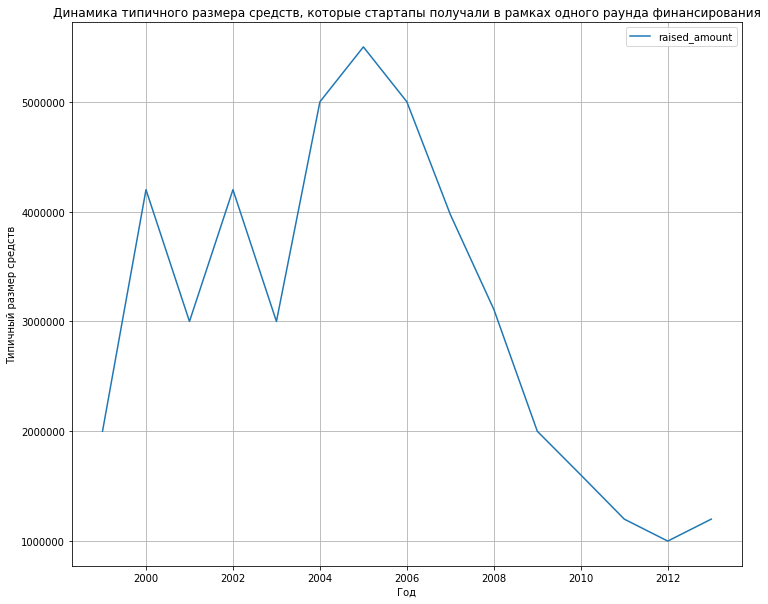

,funding_rounds,raised_amount
funded_at_year,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,95,3000000.0
2002.0,115,4200000.0
2003.0,154,3000000.0
2004.0,286,5000000.0
2005.0,1624,5500000.0
2006.0,2409,5000000.0
2007.0,3220,3973320.0


In [44]:
# Построим график линейной диаграммы

pivot_raised_amount_new['raised_amount'].plot(kind='line',
               title=f'Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования',
               legend=True,
               rot=0,
               figsize=(12, 10))

plt.xlabel('Год')
plt.ylabel('Типичный размер средств')
plt.grid()
plt.ticklabel_format(style='plain', axis='y')

plt.show()
print()
display(pivot_raised_amount_new)

Результатом выполнения данного задания являются ответы на следующие вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

На основе полученных данных, мы можем ответить на поставленные перед нами вопросы:

- Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году (5.5 млн)

- В 2013 году наблюдалась тенденция на увеличение количества раундов по сравнению с предыдущими годами. Тенденция на увеличение типичного размера средств, получаемых в рамках одного раунда финансирования, наблюдалась только по сравнению с 2012 годом. С 1999 по 2010 годы типичный размер средств, получаемых в рамках одного раунда финансирования, был больше по сравнению с 2013 годом


### 2.2. Люди и их образование

Для оценки полноты информации об образовании сотрудников, сначала необходимо объединить датасеты `people.csv` и `education.csv`

In [45]:
# Соединяем данные в единый датафрейм people_education_df

people_education_df = pd.merge(people_df, education_df, how = 'left', left_on='id', right_on='person_id')
display(people_education_df.head())

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,mark,zuckerberg,5.0,NaN,2415.0,10.0,harvard university,NaN
1,100,peter,lester,27.0,NaN,NaN,NaN,NaN,NaN
2,1000,dr. steven,e. saunders,292.0,NaN,NaN,NaN,NaN,NaN
3,10000,neil,capel,2526.0,NaN,NaN,NaN,NaN,NaN
4,100000,sue,pilsch,NaN,NaN,NaN,NaN,NaN,NaN


Определяем количество сотрудников в каждой компании

In [46]:
# Определяем количество сотрудников в каждой компании

company_people_count = people_education_df.groupby('company_id')['id_x'].count().reset_index()
display(company_people_count)

,company_id,id_x
0,1.0,3
1,2.0,1
2,3.0,5
3,4.0,18
4,5.0,84
...,...,...
22917,285897.0,2
22918,285953.0,1
22919,285972.0,2
22920,285996.0,1


Считаем количество сотрудников без образования

In [47]:
# Считаем количество сотрудников без образования

without_education = people_education_df.groupby('company_id').agg(education_count_0 = ('graduated_at', lambda x: x.isna().sum())).reset_index()
display(without_education)

,company_id,education_count_0
0,1.0,3
1,2.0,0
2,3.0,2
3,4.0,4
4,5.0,49
...,...,...
22917,285897.0,1
22918,285953.0,1
22919,285972.0,2
22920,285996.0,1


Для визуального удобства объединим полученные данные в единую таблицу

In [48]:
# Объединяем полученные данные в единую таблицу

table = pd.merge(company_people_count, without_education, on = 'company_id')
table.columns = ['company_id', 'count_people', 'education_count_0']
display(table)

,company_id,count_people,education_count_0
0,1.0,3,3
1,2.0,1,0
2,3.0,5,2
3,4.0,18,4
4,5.0,84,49
...,...,...,...
22917,285897.0,2,1
22918,285953.0,1,1
22919,285972.0,2,2
22920,285996.0,1,1


На данный момент таблица состоит из трёх столбцов:
- `company_id` - идентификатор компании
- `count_people` - количество сотрудников, работающих в компании
- `education_count_0` - - количество сотрудников без информации об уровне образования

Рассчитаем долю сотрудников без информации об образовании в каждой компании (в %) и добавим данные в новый столбец к таблице `table`.

In [49]:
# Рассчитываем долю сотрудников без информации об образовании (в %)

table['prop_education_count_0'] = round(table['education_count_0']/table['count_people']*100, 2)
display(table)

,company_id,count_people,education_count_0,prop_education_count_0
0,1.0,3,3,100.00
1,2.0,1,0,0.00
2,3.0,5,2,40.00
3,4.0,18,4,22.22
4,5.0,84,49,58.33
...,...,...,...,...
22917,285897.0,2,1,50.00
22918,285953.0,1,1,100.00
22919,285972.0,2,2,100.00
22920,285996.0,1,1,100.00


Таблица пополнилась новым столбцом `prop_education_count_0` с информацией о доле сотрудников без информации об образовании в каждой компании (в %)

Разделим все компании на несколько групп по количеству сотрудников и добавим данные в новый столбец к таблице `table`. Это необходимо для корректной оценки средней доли сотрудников без информации об образовании в каждой из групп

Но перед тем, как разделять все компании на группы, необходимо установить границы этих групп. Для этого нам необходимо изучить статистическое описание данных столбца `count_people` с помощью метода `describe()`

In [50]:
# Выведем статистическое описание данных столбца count_people

table['count_people'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
80%          2.000000
85%          3.000000
90%          3.000000
95%          5.000000
99%         10.790000
max        376.000000
Name: count_people, dtype: float64

Мы видим, что в 50% компаний работает всего 1 сотрудник, в 75% компаний количество сотрудников не превышает 2, в 85% компаний - не превышает 3, в 95% компаний - не превышает 5, в 99% - не превышает 10. Поэтому мы не можем взять слишком большие границы для групп.

Исходя из этого, мы разделим все компании на следующие группы:

- Компании с 1 сотрудником
- Компании с 2 сотрудниками
- Компании с 3-5 сотрудниками
- Компании с 6-10 сотрудниками
- Компании с 11+ сотрудниками

In [51]:
# Разделяем все компании на несколько групп по количеству сотрудников

table['people_group_count'] = pd.cut(table['count_people'], bins = [1, 2, 3, 6, 11, float('inf')], labels = ["1 сотрудник", "2 сотрудника", "3-5 сотрудников", "6-10 сотрудников", "11+ сотрудников"], right=False)
display(table)

,company_id,count_people,education_count_0,prop_education_count_0,people_group_count
0,1.0,3,3,100.00,3-5 сотрудников
1,2.0,1,0,0.00,1 сотрудник
2,3.0,5,2,40.00,3-5 сотрудников
3,4.0,18,4,22.22,11+ сотрудников
4,5.0,84,49,58.33,11+ сотрудников
...,...,...,...,...,...
22917,285897.0,2,1,50.00,2 сотрудника
22918,285953.0,1,1,100.00,1 сотрудник
22919,285972.0,2,2,100.00,2 сотрудника
22920,285996.0,1,1,100.00,1 сотрудник


Далее рассчитаем среднюю долю сотрудников без информации об образовании в каждой из групп (в %)

In [52]:
# Рассчитываем среднюю долю сотрудников без информации об образовании в каждой из групп (в %)

group_education_count_0 = table.groupby('people_group_count')['prop_education_count_0'].mean()
display(group_education_count_0)

people_group_count
1 сотрудник         67.159011
2 сотрудника        40.728617
3-5 сотрудников     44.176325
6-10 сотрудников    52.927188
11+ сотрудников     56.682478
Name: prop_education_count_0, dtype: float64

Исходя из полученных данных, мы можем сделать вывод о том, что в каждой из групп компаний, разделённых по количеству сотрудников, наблюдается значительное отсутствие информации об образовании сотрудников. Если в случае компаний, в которых работают 2 сотрудника, отсутствует около 40% информации об образовании сотрудников, то в компаниях, где работает 1 сотрудников, отсутствует почти 70% информации об образовании сотрудников. Исходя из этого, мы делаем вывод о том, что информация об образовании сотрудников недостаточно полна

Помимо этого, заказчик интересовался тем, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний. Исходя из расчёта средней долю сотрудников без информации об образовании в каждой из групп, можно заметить, что с увеличением количества сотрудников в компании, увеличивается доля сотрудников без информации об образовании (за исключением группы компаний, где работает всего 1 сотрудник):

- 2 сотрудника - отсутствует 40% информации об образовании
- 3-5 сотрудников - отсутствует 44% информации об образовании
- 6-10 сотрудников - отсутствует 52% информации об образовании
- 11+ сотрудников - отсутствует 56% информации об образовании

Отвечая на вопрос о том, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`, необходимо вспомнить о том, какую информацию содержит эта таблица

Таблица `degrees` содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Данная таблица помогает узнать больше информации об образовании только тех сотрудников, у которых известна информация об образовании. Следовательно, для изучения доли сотрудников без информации об образовании таблица `degrees.csv` с информацией о типе образования сотрудника - не нужна

Присоединить таблицу `degrees.csv` к датафрейму `people_education_df` - не получится, поскольку типы данных в столбцах с идентификаторами сотрудников в данных таблицах - не совпадают (в таблице `people_education_df` тип ланных столбца `id_x` - `int64` - целочисленные значения, а в таблице `degrees_df` тип данных столбцах `object_id` - `object` - строковые данные)

In [53]:
# Подтверждаем, что типы данных идентификаторы сотрудников в таблицах people_education_df и degrees_df - не совпадают

print('Идентификаторы сотрудников в датафрейме people_education_df:')
display(people_education_df['id_x'])
print()
print('Идентификаторы сотрудников в датафрейме degrees_df:')
display(degrees_df['object_id'])

Идентификаторы сотрудников в датафрейме people_education_df:


0             10
1            100
2           1000
3          10000
4         100000
           ...  
267689     99999
267690    174088
267691    118386
267692    175827
267693    178190
Name: id_x, Length: 267694, dtype: int64


Идентификаторы сотрудников в датафрейме degrees_df:


0           p:6117
1           p:6136
2           p:6136
3           p:6005
4           p:5832
            ...   
109605    p:268589
109606    p:268527
109607    p:268527
109608    p:268528
109609    p:268528
Name: object_id, Length: 109610, dtype: object

Теперь мы можем точно ответить на вопрос о том, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv` - нет, это невозможно

### 2.3. Объединять или не объединять — вот в чём вопрос

Столбец `network_username` встречается в следующих датафреймах:

- `company_and_rounds_df` - столбец `network_username` в данном датафрейме выступает в роли ника компании в сети
- `people_df` - столбец `network_username` в данном датафрейме выступает в роли ника в социальных сетях
- `fund_df` - столбец `network_username` в данном датафрейме выступает в роли ника фонда в сети

Изучим количество уникальных значений, а также общее количество значений в столбце `network_username` в трёх разных датафреймах

In [54]:
nuniq_network_username_company_and_rounds_df = company_and_rounds_df['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username датафрейма company_and_rounds_df: {nuniq_network_username_company_and_rounds_df}')
print()
count_network_username_company_and_rounds_df = company_and_rounds_df['network_username'].count()
print(f'Общее количество значений в столбце network_username датафрейма company_and_rounds_df: {count_network_username_company_and_rounds_df}')
print()
delta1 = count_network_username_company_and_rounds_df - nuniq_network_username_company_and_rounds_df
print(f'Разница между общим и уникальным количеством значений в столбце network_username датафрейма company_and_rounds_df: {delta1}')

Количество уникальных значений в столбце network_username датафрейма company_and_rounds_df: 79374

Общее количество значений в столбце network_username датафрейма company_and_rounds_df: 95534

Разница между общим и уникальным количеством значений в столбце network_username датафрейма company_and_rounds_df: 16160


In [55]:
nuniq_network_username_people_df = people_df['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username датафрейма people_df: {nuniq_network_username_people_df}')
print()
count_network_username_people_df = people_df['network_username'].count()
print(f'Общее количество значений в столбце network_username датафрейма people_df: {count_network_username_people_df}')
print()
delta2 = count_network_username_people_df - nuniq_network_username_people_df
print(f'Разница между общим и уникальным количеством значений в столбце network_username датафрейма people_df: {delta2}')

Количество уникальных значений в столбце network_username датафрейма people_df: 38384

Общее количество значений в столбце network_username датафрейма people_df: 38867

Разница между общим и уникальным количеством значений в столбце network_username датафрейма people_df: 483


In [56]:
nuniq_network_username_fund_df = fund_df['network_username'].nunique()
print(f'Количество уникальных значений в столбце network_username датафрейма fund_df: {nuniq_network_username_fund_df}')
print()
count_network_username_fund_df = fund_df['network_username'].count()
print(f'Общее количество значений в столбце network_username датафрейма fund_df: {count_network_username_fund_df}')
print()
delta3 = count_network_username_fund_df - nuniq_network_username_fund_df
print(f'Разница между общим и уникальным количеством значений в столбце network_username датафрейма fund_df: {delta3}')

Количество уникальных значений в столбце network_username датафрейма fund_df: 2091

Общее количество значений в столбце network_username датафрейма fund_df: 2149

Разница между общим и уникальным количеством значений в столбце network_username датафрейма fund_df: 58


Исходя из проделанных действий, мы можем сделать вывод о том, что в каждом из датафреймов в столбцах `network_username` содержится следующее количество дубликатов:

- `company_and_rounds_df` - 16160 дубликатов
- `people_df` - 483 дубликатов
- `fund_df` - 58 дубликата

Но для того, чтобы понять, подходит ли для объединения данных столбец `network_username`, необходимо посмотреть, есть ли пересечения значений столбца `network_username` в разных датафреймах. Для этого используем метод `intersect`

In [57]:
# Используем уникальные значения столбцов для поиска пересечений значений столбца network_username в разных датафреймах

uniq_network_username_company_and_rounds_df = company_and_rounds_df['network_username'].unique()
uniq_network_username_people_df = people_df['network_username'].unique()
uniq_network_username_fund_df = fund_df['network_username'].unique()

len_intersection_company_and_rounds_df_people_df = len(set(uniq_network_username_company_and_rounds_df).intersection(set(uniq_network_username_people_df)))
len_intersection_company_and_rounds_df_fund_df = len(set(uniq_network_username_company_and_rounds_df).intersection(set(uniq_network_username_fund_df)))
len_intersection_people_df_fund_df = len(set(uniq_network_username_people_df).intersection(set(uniq_network_username_fund_df)))

print(f'Количество пересечений network_username между датафреймами company_and_rounds_df и people_df: {len_intersection_company_and_rounds_df_people_df}')
print()
print(f'Количество пересечений network_username между датафреймами company_and_rounds_df и fund_df: {len_intersection_company_and_rounds_df_fund_df}')
print()
print(f'Количество пересечений network_username между датафреймами people_df и fund_df: {len_intersection_people_df_fund_df}')

Количество пересечений network_username между датафреймами company_and_rounds_df и people_df: 2504

Количество пересечений network_username между датафреймами company_and_rounds_df и fund_df: 88

Количество пересечений network_username между датафреймами people_df и fund_df: 97


Исходя из этого, мы можем сделать вывод о том, что производить объединение данных по столбцу `network_username` с датафреймом `fund_df` - не стоит, поскольку количество пересечений - крайне мало. При этом стоит обратить внимание на то, что датафреймы `company_and_rounds_df` и `people_df` можно попробовать объединить между собой, так как количество пересечений существенно выше по сравнению с датафреймом `fund_df`

Таким образом, мы делаем вывод о том, что столбцы с именем `network_username` можно использовать для объединения данных из датафреймов `company_and_rounds_df` и `people_df`


### 2.4. Проблемный датасет и причина возникновения пропусков

Для приведения датафрейма `company_and_rounds_df` в удобный для анализа отдельных компаний вид, необходимо обработать пропуски в некоторых столбцах, а также провести агрегацию данных по компаниям

Перед обработкой пропусков выведем общую информацию о датафрейме, первые строки датафрейма и количество пропусков

In [58]:
# Выводим информацию о датафрейме
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [59]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Выводим абсолютное и относительное количество пропусков в датафрейме company_and_rounds_df

print('Количество пропусков в датафрейме company_and_rounds_df:')
display(pd.DataFrame({'Кол-во пропусков': company_and_rounds_df.isna().sum(), 
               'Доля пропусков (в %)': company_and_rounds_df.isna().mean()*100}).reset_index()
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))

Количество пропусков в датафрейме company_and_rounds_df:


,index,Кол-во пропусков,Доля пропусков (в %)
5,closed_at,214325,98.416248
22,funded_at_year,165094,75.809784
15,funded_at,165094,75.809784
16,funding_round_type,164846,75.695905
21,is_last_round,164846,75.695905
20,is_first_round,164846,75.695905
19,participants,164846,75.695905
18,pre_money_valuation,164846,75.695905
17,raised_amount,164846,75.695905
13,funding_round_id,164846,75.695905


Стоит обратить внимание на то, что в данном датафрейме столбец `company_id` повторяется дважды. Поэтому нам необходимо удалить один из этих столбцов. Оставим тот столбец, в котором меньше пропусков

In [61]:
# Удаляем дублирующийся столбец и проверяем, что остался столбец с наименьшим количеством пропусков

company_and_rounds_df_new = company_and_rounds_df.loc[:, ~company_and_rounds_df.columns.duplicated()]
company_and_rounds_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Дублирующийся столбец `company_id` - удалён

Анализируя данный датафрейм, мы понимаем, что фактически у нас "склеены" две таблицы - данные по компаниям и данные по раундам финансирования

Допустим, для анализа нам нужны только данные для компании. Поэтому нам понадобится таблица только с этими данными, без информации о раундах. Возможна и обратная ситуация: для анализа нам нужны только данные по раундам финансирования. Поэтому нам понадобится таблица только с этими данными, без информации о компаниях

Поэтому лучше всего будет разделить нашу таблицу на две - таблица со столбцами про компании и таблица со столбцами о раундах финанасирования. Начнём с формирования отдельной таблицы по компаниям

In [62]:
# Формируем отдельную таблицу по компаниям

company_df = company_and_rounds_df_new[['company_id', 'name', 'category_code', 'status', 
                                        'founded_at', 'closed_at', 'domain', 
                                        'network_username', 'country_code', 
                                        'investment_rounds', 'funding_rounds', 
                                        'funding_total', 'milestones']]

Отдельная таблица по компаниям будет называться `company_df`. В этой таблице произведём удаление дубликатов записей

In [63]:
# Удаляем дубликаты записей

company_df = company_df.drop_duplicates(subset=['company_id', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')

Далее приступаем к формированию таблицы по раундам финансирования

In [64]:
# Формируем отдельную таблицу по раундам финансирования

rounds_df = company_and_rounds_df_new[['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'funded_at_year']]

Отдельная таблица по раундам финансирования будет называться `rounds_df`. Изучим пропуски по столбцу с раундами финансирования `funding_round_type` в данной таблице

In [65]:
# Выводим имеющиеся пропуски

display(rounds_df[rounds_df['funding_round_type'].isna()].head()) 

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
3,10.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


Всего 5 записей (меньше 1% от общего объёма данных) - поэтому удаляем эти строки из данной таблицы

In [66]:
# Удаляем пропуски

rounds_df = rounds_df.dropna(subset=['funding_round_type'])

Для наглядности выведём общую информацию о двух новых таблицах - `df_company` и `df_rounds`, и первые их строки

In [67]:
# Выводим информацию о датафрейме company_df

company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [68]:
# Выводим первые строки датафрейма company_df на экран

company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,mywebbo,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,the movie streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


In [69]:
# Выводим информацию о датафрейме rounds_df

rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52626 non-null  float64       
 1   raised_amount        52928 non-null  float64       
 2   funding_round_id     52928 non-null  float64       
 3   funded_at            52680 non-null  datetime64[ns]
 4   funding_round_type   52928 non-null  object        
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_year       52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


In [70]:
# Выводим первые строки датафрейма rounds_df на экран

rounds_df.head()

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,5250000.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0,2005.0
1,1.0,9500000.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0,2007.0
2,1.0,25000000.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0,2008.0
15,1001.0,5000000.0,1644.0,2008-02-26,series-a,0.0,3.0,1.0,1.0,2008.0
20,10014.0,0.0,6682.0,2008-09-01,angel,0.0,1.0,1.0,1.0,2008.0


На этом обработка датафрейма `company_and_rounds_df` - завершена. Результаты преобразований сохранены в два новых датафрейма - 
`company_df` и `rounds_df`. 

Датафрейм `company_df` содержит 13 столбцов и 196554 строки, в которых представлена информация о компаниях. 

- 6 столбцов обладают типом данных `object` (строковые данные):
    - `name`
    - `category_code`
    - `status`
    - `domain`
    - `network_username`
    - `country_code`
- 5 столбцов обладают типом данных `float64` (числовое значение с плавающей точкой):
    - `company_id`         
    - `investment_rounds` 
    - `funding_rounds`  
    - `funding_total`    
    - `milestones`        
- 2 столбца обладают типом данных `datetime64` (информация о дате и времени):
    - `founded_at`   
    - `closed_at`          

Датафрейм `rounds_df` содержит 10 столбцов и 52928 строк, в которых представлена информация о раундах финансирования.

- 8 столбцов обладают типом данных `float64` (числовое значение с плавающей точкой):
    - `company_id`         
    - `raised_amount` 
    - `funding_round_id`  
    - `pre_money_valuation`    
    - `participants`   
    - `is_first_round`
    - `is_last_round`
    - `funded_at_year`
- 1 столбец обладают типом данных `datetime64` (информация о дате и времени):
    - `funded_at`             
- 1 столбец обладает типом данных `object` (строковые данные):
    - `funding_round_type`   

Детальная обработка датафрейма `company_and_rounds_df` включала в себя:

- Удаление дублирующихся столбцов
- Разделение датафрейма `company_and_rounds_df` на два отдельных датафрейма - `company_df` и `rounds_df`
- Удаление оставшихся дубликатов записей
- Удаление имеющихся пропусков

Удаление остальных дубликатов, приведение названий столбцов и значений в строках к единому стилю написания и преобразование типов данных были произведены на этапе первичной предобработки данных на `Шаг 1. Знакомство с данными: загрузка и первичная предобработка`

Таким образом, мы привели данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Это обеспечит удобный отбор компаний по параметрам и расчёт показателей из расчёта на одну компанию без промежуточных агрегаций


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Для выполнения данного задания нам необходимо обратиться к новой таблице `company_df` и сделать по ней срез данных, исходя из следующего условия:

- число раундов финансирования (`funding_rounds`) > 0 ИЛИ число инвестиционных раундов (`investment_rounds`) > 0 ИЛИ статус компании (`status`) = acquired (приобретенный)

Для создания среда данных образуем новый датафрейм `company_df_new`

In [71]:
# Образуем срез данных

company_df_new = company_df.loc[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')]
display(company_df_new.info())
display(company_df_new.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


Таким образом, мы получаем новый датафрейм `company_df_new`, который является срезом данных, образованным по условиям данного задания. Он содержит 13 столбцов и 40747 строк. Напомним, что количество строк уменьшилось из-за того, что в новом датафрейме не учитывались компании, у которых количество раундов финансирования или инвестиционных раундов равно 0, а также не учитывались компании, у которых статус не принимает значение acquired (приобретенный)


### 3.2. Анализ выбросов

Для того чтобы понять, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся, необходимо построить диаграмму размаха и описательную статистику по столбцу `funding_total`. Тогда мы сможем определить - какие значения являются более распространёнными, а какие значения можно отнести к выбросам и аномалиям

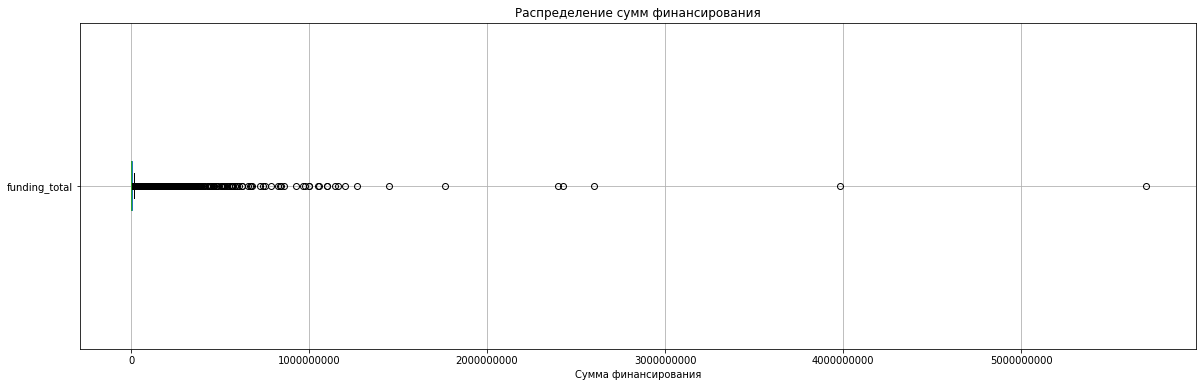

In [72]:
# Построим график диаграммы размаха

plt.figure(figsize=(20, 6))

company_df_new.boxplot(column = 'funding_total', vert = False)

plt.title('Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

По данной диаграмме размаха, мы не можем увидеть, где сосредоточено большее количество значений из-за имеющихся выбросов. Вдобавок к этому, мы не можем точно увидеть минимумы и максимумы без учёта аномалий, нижний и верхний квартили, а также медианное значение. Поэтому с помощью `showfliers = False` убёрём имеющиеся выбросы

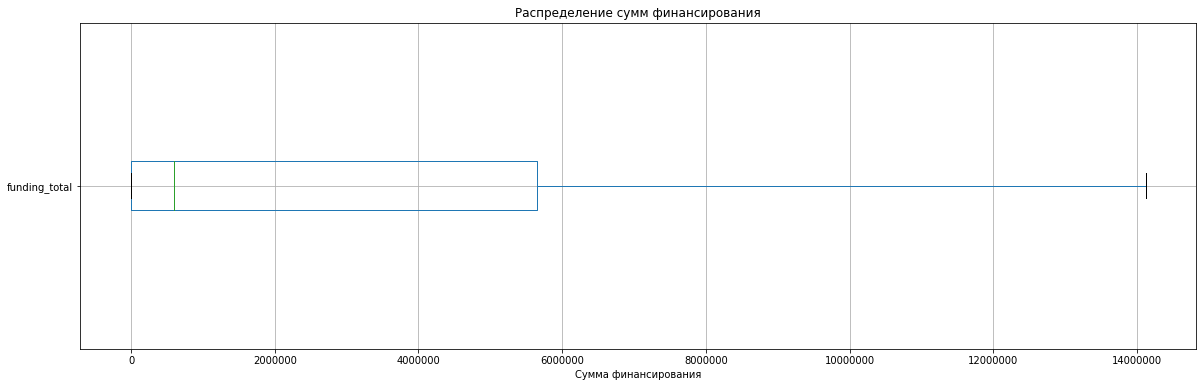

count        40747.000000
mean      10135609.636734
std       56464359.977256
min              0.000000
25%              0.000000
50%         600000.000000
75%        5650650.000000
80%        8749416.000000
85%       13227320.000000
90%       22391380.000000
95%       43500000.000000
99%      133948660.000000
max     5700000000.000000
Name: funding_total, dtype: float64

In [73]:
# Построим график диаграммы размаха без выбросов

plt.figure(figsize=(20, 6))

company_df_new.boxplot(column = 'funding_total', vert = False, showfliers = False)

plt.title('Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')
plt.ticklabel_format(style='plain', axis='x')

plt.show()
print()
pd.set_option('float_format', '{:f}'.format)
company_df_new['funding_total'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

По второй диаграмме размаха, мы можем увидеть, что большее количество значений сосредоточено в диапазоне от 0 до 14 млн. К выбивающимся значениям можно отнести суммы финансирования, превышающие 14 - 15 млн - как раз таки они и будут являться выбросами

Теперь мы можем оценить разброс имеющихся значений более детально. Обратим внимание на то, что минимумом без учёта аномалий и нижним квартилем (25% значений) является одно и то же значение - 0. Верхней границей квартиля (75% значений) является значение около 5.5 млн - то есть, 75% значений не превышают 5.5 млн. Максимальным значением без учёта аномалий является значений около 14 млн.

Исходя из первой диаграммы размаха, построенной с учётом всех выбросов, мы можем сделать вывод о том, что в качестве типичного размера финансирования мы не можем взять среднее значение, поскольку эти показатели дадут ложное представление об имеющихся данных. Наиболее верным решением будет взять медианное значение - оно и послужит типичным размером финансирования. Значения свыше около 14 миллионов (значение около 85-ого перцентиля) будут являться выбросами, а значения свыше около 130 миллионов (99-ый перцентиль) будут являться аномалиями

На основе полученных данных, мы можем ответить на поставленные перед нами вопросы:
    
- 600 тысяч - типичный размер общего финансирования для одной компании
- Свыше 14 - 15 млн - выбивающийся размер общего финансирования для одной компании
- По показателю среднего значения, возвращаемого методом `.describe()`, невозможно правильно установить размер типичных значений. При этом можно использовать медианное значение, которое позволит наиболее точно определить типичный размер общего финансирования для одной компании


### 3.3. Куплены забесплатно?

Для исследования компаний, которые были проданы за ноль или один доллар при ненулевом общем объёме финансирования, необходимо создать новый срез данных, исходя из следующего условия:

- сумма сделки (`price_amount`) = 0 или 1
- сумма финансирования (`funding_total`) > 0 долларов

Но перед этим необходимо объединить два датафрейма - `company_df_new`, который содержит информацию о сумме финансирования и `acquisition_df`, который содержит информацию о сумме сделки. Объединять датафреймы будет по двум столбцам: `company_id` (индетификатор компании) из датафрейма `company_df_new` и `acquired_company_id` (идентификатор покупаемой компании) из датафрейма `acquisition_df`

In [74]:
# Соединяем данные в единый датафрейм company_acquisition_df

company_acquisition_df = pd.merge(company_df_new, acquisition_df, left_on='company_id', right_on='acquired_company_id')
display(company_acquisition_df.info())
display(company_acquisition_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9390 entries, 0 to 9389
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            9390 non-null   float64       
 1   name                  9390 non-null   object        
 2   category_code         6573 non-null   object        
 3   status                9390 non-null   object        
 4   founded_at            4805 non-null   datetime64[ns]
 5   closed_at             35 non-null     datetime64[ns]
 6   domain                7075 non-null   object        
 7   network_username      2544 non-null   object        
 8   country_code          6695 non-null   object        
 9   investment_rounds     9390 non-null   float64       
 10  funding_rounds        9390 non-null   float64       
 11  funding_total         9390 non-null   float64       
 12  milestones            9390 non-null   float64       
 13  id                

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10.000000,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.000000,0.000000,0.000000,0.000000,1,11,10,NaN,20000000,2007-05-30
1,100.000000,there,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.000000,0.000000,0.000000,4.000000,20,377,100,cash,0,2005-05-29
2,1001.000000,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.000000,1.000000,5000000.000000,3.000000,1901,5,1001,cash_and_stock,47500000,2009-08-10
3,10014.000000,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.000000,1.000000,0.000000,4.000000,3878,23054,10014,NaN,0,2010-09-30
4,100265.000000,coastal supply company,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,6106,38215,100265,NaN,0,2011-09-06


Мы получили новый датафрейм `company_acquisition_df`, в котором содержится информация о компаниях и о приобретениях этих компаний. Он включает в себя 19 столбцов и 9390 строк. Теперь можем приступать к созданию нового среза. Напомним условия:

- сумма сделки (`price_amount`) - 0 или 1 доллар
- сумма финансирования (`funding_total`) - больше 0 долларов

In [75]:
# Образуем срез данных

company_acquisition_df_new = company_acquisition_df.loc[((company_acquisition_df['price_amount'] == 0) | (company_acquisition_df['price_amount'] == 1)) & (company_acquisition_df['funding_total'] > 0)]
display(company_acquisition_df_new.info())
display(company_acquisition_df_new.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 7 to 9386
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   float64       
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   float64       
 10  funding_rounds        1618 non-null   float64       
 11  funding_total         1618 non-null   float64       
 12  milestones            1618 non-null   float64       
 13  id                

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
7,10054.000000,jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.000000,7.000000,121500000.000000,3.000000,9288,23283,10054,cash_and_stock,0,2013-08-13
17,101312.000000,sidetour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.000000,3.000000,4000000.000000,2.000000,9653,11391,101312,NaN,0,2013-09-18
18,101340.000000,choicepass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.000000,1.000000,250000.000000,1.000000,7272,1972,101340,NaN,0,2012-06-18
19,10137.000000,producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.000000,3.000000,1310000.000000,2.000000,8254,757,10137,cash_and_stock,0,2012-11-05
20,10139.000000,tradecard,enterprise,acquired,1999-01-01,NaT,tradecard.com,tradecard,USA,0.000000,2.000000,44925000.000000,1.000000,9326,44008,10139,NaN,0,2013-04-01


Мы получили новый датафрейм `company_acquisition_df_new`, в котором содержится информация только о проданных за 0 или 1 доллар компаниях с ненулывым общим объёмом финансирования. Данный датафрейм включает в себя 19 столбцов и 1618 строк. Исследуем компании, входящие в данный сред данных, с помощью метода `describe()`

In [76]:
# Выводим описательную статистику

company_acquisition_df_new[['investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'price_amount']].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

,investment_rounds,funding_rounds,funding_total,milestones,price_amount
count,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000
mean,0.008035,1.890606,18152961.943758,1.457973,0.000000
std,0.118993,1.243322,144503027.470521,1.226295,0.000000
min,0.000000,1.000000,3750.000000,0.000000,0.000000
25%,0.000000,1.000000,2000000.000000,0.000000,0.000000
50%,0.000000,1.000000,6000000.000000,1.000000,0.000000
75%,0.000000,2.000000,15500000.000000,2.000000,0.000000
80%,0.000000,3.000000,20000000.000000,2.000000,0.000000
85%,0.000000,3.000000,25353735.000000,3.000000,0.000000
90%,0.000000,3.000000,33015810.000000,3.000000,0.000000


Исходя из полученных данных, можем сделать следующие выводы:

Инвестиционные раунды (`investment_rounds`):

- Минимальное значение - 0
- Медианное значение - 0
- Среднее значение - 0.008
- Максимальное значение - 3

Раунды финансирования (`funding_rounds`):

- Минимальное значение - 1
- Медиана - 1
- Среднее значение - 1.89
- Максимальное значение - 12

Сумма финансирования (`funding_total`):

- Минимальная сумма финансирования - 3750
- Медиана - 6 млн
- Среднее значение - 18.15 млн
- Максимальная сумма финансирования - 5.7 млрд

Вехи финансирования (`milestones`):

- Минимальное значение вехов финансирования - 0
- Медиана - 1
- Среднее значение - 1.45
- Максимальное значение вехов финансирования - 6

Сумма сделки (`price_amount`):

- Минимальное значение вехов финансирования - 0
- Медиана - 0
- Среднее значение - 0
- Максимальное значение вехов финансирования - 0

Исходя из того, что у всех переменных медианное значение ниже среднего, можно сделать вывод о том, что распределение данных - ненормальное, имеет правостороннюю ассиметрию (положительную скошенность), а значит - в данных по прежнему остались выбросы, которые оттягивают распределение вправо

Заметим, что в данных нет компаний, которые были проданы за 1 доллар - это подтверждает одинаковое минимальное и максимальное значение суммы сделки, которое равно 0

Далее мы можем приступить к аналитическому расчёту верхней и нижней границы выбросов для столбца `funding_total`.

In [77]:
# Вычисляем квартили Q1 и Q3

Q1 = company_acquisition_df_new['funding_total'].quantile(0.25)
Q3 = company_acquisition_df_new['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR

IQR = Q3 - Q1

# Определяем нижнюю границу выбросов

lower_bound = 1.5 * IQR - Q1

# Определяем верхнюю границу выбросов

upper_bound = Q3 + 1.5 * IQR

print(f'Нижняя граница выбросов: {lower_bound}')
print(f'Верхняя граница выбросов: {upper_bound}')

Нижняя граница выбросов: 18250000.0
Верхняя граница выбросов: 35750000.0


Исходя из проведённых вычислений, мы можем сделать следующие выводы:

- Нижняя граница выбросов для столбца `funding_total` - 18.25 млн (соответствует 25-ому процентилю)
- Верхняя граница выбросов для столбца `funding_total` - 35.75 млн (соответствует 75-ому процентилю)

Оценивая корректность планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям, важно отметить, что такая замена приведёт к ложному представлению об имеющихся данных. Если брать за нижнюю и верхнюю границы выбросов значения, рассчитанные по процентилям, при устранении этих выбросов можно потерять существенную долю данных. В итоге анализ на искажённом срезе данных приведёт к некорретным результатам исследовательского анализа данных


### 3.4. Цены стартапов по категориям

Для выполнения данного задания воспользуемся датафреймом - `company_df_new`. В нём представлена информация о компаниях. В контексте данного задания нас интересует столбцы `category_code` (категория области деятельности компании) и `funding_total` (сумма финансирования). Именно по ним и будем выделять категории стартапов. Напомним, что среди категорий стартапов необходимо выделить категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Для этого мы создадим два отдельных рейтинга. Первый рейтинг будет содержать информацию о категориях стартапов с наибольшими ценами, а второй будет содержать информацию о категориях с наибольшим разбросом цен за стартап

Начнём с рейтинга стартапов с наибольшими ценами

In [78]:
# Составляем рейтинг стартапов с наибольшими ценами

top15_price = company_df_new.groupby('category_code')['funding_total'].median().sort_values(ascending = False).reset_index()
top15_price.head(15)

,category_code,funding_total
0,semiconductor,8100000.000000
1,cleantech,6000000.000000
2,medical,5400000.000000
3,nanotech,5115960.000000
4,biotech,4000000.000000
5,security,2024640.000000
6,analytics,2000000.000000
7,network_hosting,2000000.000000
8,manufacturing,1895040.000000
9,enterprise,1617100.000000


Мы получаем топ-15 стартапов с наибольшими ценами (`top15_price`). Столбец с ценами был сформирован на основе медианного значения по каждой категории, поскольку ранее мы выявили, что опора на среднее значение при анализе данных может исказить результаты анализа данных. В рейтинг включено именно 15 категорий, поскольку было принято решение отбирать только те категории стартапов, в которых медианное значение по столбцу `funding_total` превышало 1 миллион

Далее приступим к составлению рейтинга стартапов с наибольшим разбросом цен

In [79]:
# Составляем рейтинг стартапов с наибольшим разбросом цен за стартап

top7_iqr = (company_df_new.groupby('category_code')['funding_total']
              .agg(Q1=lambda x: x.quantile(0.25), Q3=lambda x: x.quantile(0.75))
              .assign(IQR=lambda x: x['Q3'] - x['Q1'])
              .sort_values(by='IQR', ascending=False)
              .reset_index()[['category_code', 'IQR']])
top7_iqr.head(7)

,category_code,IQR
0,cleantech,24737000.000000
1,semiconductor,23499950.000000
2,nanotech,21513225.000000
3,medical,20997987.000000
4,biotech,18815000.000000
5,network_hosting,13544375.000000
6,security,11995000.000000


Мы получаем топ-7 стартапов с наибольшим разбросом цен за стартап (`top7_iqr`). Столбец с ценами был сформирован на основе межквартильного размаха по каждой категории, так как именно этот показатель позволяет наиболее точно оценить разброс цен за стартап (в отличии от стандартного отклонения относительно среднего значения - в нашем датасете наблюдается ненормальное распределение данных, поэтому не стоит опираться на среднее значение и связанные с ним показатели при исследовательском анализе данных). В рейтинг включено именно 7 категорий, поскольку было принято решение отбирать только те категории стартапов, в которых межквартильный размах по столбцу `funding_total` превысил 10 миллионов

Таким образом мы можем сделать следующие выводы:

- Минимальная цена стартапа в топ-15 стартапов с наибольшими ценами - 1.1 млн (категория - `transportation`)
- Максимальная цена стартапа в топ-15 стартапов с наибольшими ценами - 8.1 млн (категория - `semiconductor`)
- Минимальный разброс цен в топ-7 стартапов с наибольшим разбросом цен за стартап - 11.995 млн (категория - `security`)
- Максимальная цена стартапа в топ-7 стартапов с наибольшим разбросом цен за стартап - 24.737 млн (категория - `cleantech`)


### 3.5. Сколько раундов продержится стартап перед покупкой

Для выполнения данного задания создадим срез данных на основе датафрейма `company_new` (в нём представлена информация о компаниях). Условием данного среза будет являться ненулевое положительное значение раундов финансирования (`funding_rounds > 0`) 

In [80]:
# Образуем срез данных

company_df_new_1 = company_df.loc[(company_df['funding_rounds'] > 0)]
display(company_df_new_1.info())
display(company_df_new_1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31707 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         31707 non-null  float64       
 1   name               31707 non-null  object        
 2   category_code      30463 non-null  object        
 3   status             31707 non-null  object        
 4   founded_at         24467 non-null  datetime64[ns]
 5   closed_at          2114 non-null   datetime64[ns]
 6   domain             30171 non-null  object        
 7   network_username   19070 non-null  object        
 8   country_code       29565 non-null  object        
 9   investment_rounds  31707 non-null  float64       
 10  funding_rounds     31707 non-null  float64       
 11  funding_total      31707 non-null  float64       
 12  milestones         31707 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 3.

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.000000,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.000000,3.000000,39750000.000000,5.000000
15,1001.000000,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.000000,1.000000,5000000.000000,3.000000
20,10014.000000,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.000000,1.000000,0.000000,4.000000
21,10015.000000,fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.000000,5.000000,68069200.000000,0.000000
26,100155.000000,mtpv,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.000000,3.000000,10125300.000000,1.000000


Таким образом, мы получаем новый датафрейм `company_df_new_1`, который является срезом данных, образованным по условиям данного задания. Он содержит 13 столбцов и 31707 строк. Напомним, что количество строк уменьшилось из-за того, что в новом датафрейме учитывались только те компании, у которых количество раундов финансирования больше 0

В контексте данного задания нас интересует столбец `funding_rounds` (число раундов финансирования) и `status` (статус компании). Для нахождения типичного значение количества раундов для каждого возможного статуса стартапа, сгруппируем данные по столбцу `status` и применим к столбцу `funding_rounds` функцию нахождения медианного значения

In [81]:
# Находим типичное значение количества раундов для каждого возможного статуса стартапа

status_funding_rounds_median = company_df_new_1.groupby('status')['funding_rounds'].median().sort_values().reset_index()
status_funding_rounds_median

,status,funding_rounds
0,acquired,1.000000
1,closed,1.000000
2,operating,1.000000
3,ipo,2.000000


Мы видим, что для статусов стартапа `acquired`, `closed`, `operating`  типичное значение количества раундов - 1, для статуса стартапа `ipo` типичное значение количества раундов - 2

Далее построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделаем это с помощью столбчатых диаграмм

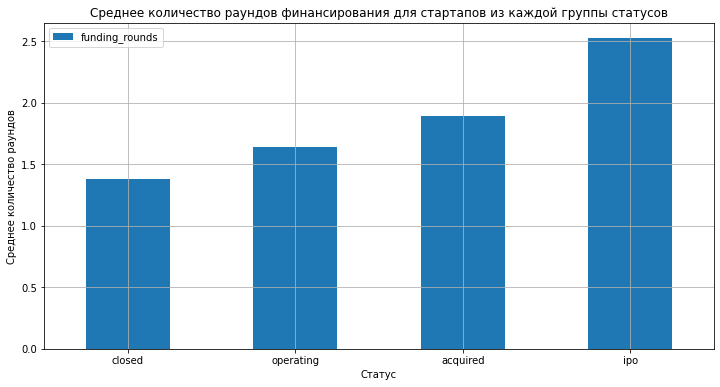

,status,funding_rounds
0,closed,1.383437
1,operating,1.642359
2,acquired,1.896645
3,ipo,2.526531


In [82]:
# Построим график столбчатой диаграммы

status_funding_rounds_mean = company_df_new_1.groupby('status')['funding_rounds'].mean().sort_values()
status_funding_rounds_mean.plot(kind='bar',
               title=f'Среднее количество раундов финансирования для стартапов из каждой группы статусов',
               legend=True,
               ylabel='Среднее количество раундов',
               xlabel='Статус',
               rot=0,
               figsize=(12, 6))
plt.grid()

plt.show()
print()
status_funding_rounds_mean.reset_index()

Исходя из полученной информации, мы можем сделать следующий вывод:

- Минимальное количество раундов финансирования принадлежит стартапам со статусом `closed` (закрытый)
- Максимальное количество раундов финансирования принадлежит стартапам со статусом `ipo` (первое публичное размещение акций)

Таким образом, мы можем предположить, что стартапы со статусом `ipo` нуждаются в больших инвестициях и раундах финансирования, в то время как стартапы со статусом `closed` уже закрыты. Вероятнее всего, стартапы со статусом `closed` были закрыты из-за отсутствия перспективы долгосрочного развития: в перспективе такие стартапы не смогли бы получить огромный успех и принести существенную прибыль компании, которая приобрела данный стартап


## Шаг 4. Итоговый вывод и рекомендации

### Общий обзор проделанной работы и ответы на исследовательские вопросы

Выполнение данного проекта состояло из нескольких шагов:

<big>**Шаг 1. Знакомство с данными: загрузка и первичная предобработка**</big>

На данном шаге были выполнены следующие действия:

*1.1. Вывод общей информации, исправление названия столбцов*

Названия столбцов датафрейма `company_and_rounds_df` приведены к стилю `snake case`

Все значения в столбцах со строковыми данными приведены к единому стилю написания (нижний регистр, убранные пробелы в начале и в конце строки)

*1.2. Смена типов и анализ пропусков*

Изменён тип данных на `datetime64` (информация о дате и времени) у следующих столбцов:

- `acquired_at` - датафрейм `acquisition_df`
- `founded_at`  - датафрейм `company_and_rounds_df`
- `closed_at` - датафрейм `company_and_rounds_df`
- `funded_at` - датафрейм `company_and_rounds_df`
- `founded_at` - датафрейм `fund_df`

Сделан следующий вывод:

- Наибольшее количество пропусков содержится в датафрейме `company_and_rounds_df`. Причём доля пропусков в столбцах данного датафрейма может быть как крайне мала (меньше 1% пропусков), так и крайне высока (98% пропусков). Очевидно, что для решения задач проекта необходимо обратить пристальное внимание на имеющиеся пропуски и принять попытки обработать их без потери значительной части данных, которые могут использоваться в ходе исследовательского анализа данных

<big>**Шаг 2. Предобработка данных, предварительное исследование**</big>

На данном шаге были выполнены следующие действия:

*2.1. Раунды финансирования по годам*

На основе датасета `company_and_rounds.csv` построена сводная таблица по годам, в которой на основании столбца `raised_amount` для каждого года указан:

- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год (в этой таблице оставлена информация только для тех лет, для которых есть информация о более чем 50 раундах финансирования)
    
Построен график, который отражает динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования

Даны ответы на поставленные вопросы:

*В каком году типичный размер собранных в рамках одного раунда средств был максимален?*

- Ответ: типичный размер собранных в рамках одного раунда средств был максимален в 2005 году (5.5 млн)

*Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?*

- Ответ: в 2013 году наблюдалась тенденция на увеличение количества раундов по сравнению с предыдущими годами. Тенденция на увеличение типичного размера средств, получаемых в рамках одного раунда финансирования, наблюдалась только по сравнению с 2012 годом. С 1999 по 2010 годы типичный размер средств, получаемых в рамках одного раунда финансирования, был больше по сравнению с 2013 годом

*2.2. Люди и их образование*

Для оценки полноты информации об образовании сотрудников были объединены датасеты `people.csv` и `education.csv`. Новый датафрейм получил название `people_education_df`

Создана таблица, в которой все компании были разделены на несколько групп по количеству сотрудников. Также была оценена средняя доля сотрудников без информации об образовании в каждой из групп

Сделан следующий вывод:

- В каждой из групп компаний, разделённых по количеству сотрудников, наблюдается значительное отсутствие информации об образовании сотрудников. Если в случае компаний, в которых работают 2 сотрудника, отсутствует около 40% информации об образовании сотрудников, то в компаниях, где работает 1 сотрудников, отсутствует почти 70% информации об образовании сотрудников. Исходя из этого, мы делаем вывод о том, что информация об образовании сотрудников недостаточно полна

- С увеличением количества сотрудников в компании, увеличивается доля сотрудников без информации об образовании (за исключением группы компаний, где работает всего 1 сотрудник):

    - 2 сотрудника - отсутствует 40% информации об образовании
    - 3-5 сотрудников - отсутствует 44% информации об образовании
    - 6-10 сотрудников - отсутствует 52% информации об образовании
    - 11+ сотрудников - отсутствует 56% информации об образовании

Дан ответ на вопрос о том, возможно ли для выполнения задания присоединить к таблице `people_education_df` ещё и таблицу `degrees.csv`:

- Присоединить таблицу `degrees.csv` к датафрейму `people_education_df` - не получится, поскольку типы данных в столбцах с идентификаторами сотрудников в данных таблицах - не совпадают

*2.3. Объединять или не объединять — вот в чём вопрос*

Изучено количество уникальных значений, а также общее количество значений в столбце `network_username` в трёх разных датафреймах - `company_and_rounds_df`, `people_df`, `fund_df`

Изучено количество дубликатов, которые содержатся в столбце `network_username` в трёх разных датафреймах - `company_and_rounds_df`, `people_df`, `fund_df`

Изучено количество пересечений столбца `network_username` между тремя разными датафреймами - `company_and_rounds_df`, `people_df`, `fund_df`

Сделан следующий вывод:

- Производить объединение данных по столбцу `network_username` с датафреймом `fund_df` - не стоит, поскольку количество пересечений - крайне мало
- Столбцы с именем `network_username` можно использовать для объединения данных из датафреймов `company_and_rounds_df` и `people_df`, так как количество пересечений существенно выше по сравнению с датафреймом `fund_df`

*2.4. Проблемный датасет и причина возникновения пропусков*

В датафрейме `company_and_rounds_df` удалён дублирующийся столбец `company_id` (результаты сохранены в новый датафрейм `company_and_rounds_df_new`)

Датафрейм `company_and_rounds_df_new` разделён на две таблицы - таблица со столбцами про компании и таблица со столбцами о раундах финанасирования. Результаты преобразований сохранены в два новых датафрейма - 
`company_df` и `rounds_df`

Удалены дубликаты записей и имеющиеся пропуски

С помощью этих преобразований данные приведены в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Это обеспечит удобный отбор компаний по параметрам и расчёт показателей из расчёта на одну компанию без промежуточных агрегаций

<big>**Шаг 3. Исследовательский анализ объединённых таблиц**</big>

На данном шаге были выполнены следующие действия:

*3.1. Объединение данных*

Создана новая таблица `company_df_new`, которая является срезом данных таблицы `company_df` со следующими условиями:

- число раундов финансирования (`funding_rounds`) > 0 ИЛИ число инвестиционных раундов (`investment_rounds`) > 0 ИЛИ статус компании (`status`) = acquired (приобретенный)

*3.2. Анализ выбросов*

Построена диаграмма размаха и составлена описательная статистика по столбцу `funding_total` на основе датафрейма `company_df_new`. По ним были сделаны следующие выводы:

- Большее количество значений сосредоточено в диапазоне от 0 до 14 млн
- Минимумом без учёта аномалий и нижним квартилем (25% значений) является одно и то же значение - 0
- Верхней границей квартиля (75% значений) является значение около 5.5 млн
- Максимальным значением без учёта аномалий является значений около 14 млн
- Значения свыше около 14 миллионов (значение около 85-ого перцентиля) будут являться выбросами, а значения свыше около 130 миллионов (99-ый перцентиль) будут являться аномалиями
- 600 тысяч - типичный размер общего финансирования для одной компании
- Свыше 14 - 15 млн - выбивающийся размер общего финансирования для одной компании
- По показателю среднего значения, возвращаемого методом `.describe()`, невозможно правильно установить размер типичных значений. При этом можно использовать медианное значение, которое позволит наиболее точно определить типичный размер общего финансирования для одной компании

*3.3. Куплены забесплатно?*

Создан новый датафрейм на основе соединения двух датафреймов - `company_df_new` (информация о компаниях) и `acquisition_df` (информация о покупках одними компаниями других компаний) под названием `company_acquisition_df`

Создана новая таблица `company_acquisition_df_new`, которая является срезом данных таблицы `company_acquisition_df` со следующими условиями:

- сумма сделки (`price_amount`) = 0 или 1
- сумма финансирования (`funding_total`) > 0

Проведено исследование компаний, входящих в таблицу `company_acquisition_df_new`. Сделаны следующие выводы:

- Распределение данных - ненормальное, имеет правостороннюю ассиметрию (положительную скошенность), а значит - в данных имеются выбросы, которые оттягивают распределение вправо

- В данных нет компаний, которые были проданы за 1 доллар

С помощью аналитических расчётов найдены верхняя и нижняя границы выбросов для столбца `funding_total`:

- Нижняя граница выбросов для столбца `funding_total` - 18.25 млн (соответствует 25-ому процентилю)
- Верхняя граница выбросов для столбца `funding_total` - 35.75 млн (соответствует 75-ому процентилю)

Сделан следующий вывод:

- Если брать за нижнюю и верхнюю границы выбросов значения, рассчитанные по процентилям, при устранении этих выбросов можно потерять существенную долю данных. В итоге анализ на искажённом срезе данных приведёт к некорретным результатам исследовательского анализа данных. Поэтому планируемая заказчиком замена нижней и верхней границы выбросов на значения, рассчитанные по процентилям, приведёт к ложному представлению об имеющихся данных

*3.4. Цены стартапов по категориям*

Созданы два рейтинга:

- Топ-15 стартапов с наибольшими ценами (`top15_price`)
- Топ-7 стартапов с наибольшим разбросом цен за стартап (`top7_iqr`)

Сделаны следующие выводы:

- Минимальная цена стартапа в топ-15 стартапов с наибольшими ценами - 1.1 млн (категория - `transportation`)
- Максимальная цена стартапа в топ-15 стартапов с наибольшими ценами - 8.1 млн (категория - `semiconductor`)
- Минимальный разброс цен в топ-7 стартапов с наибольшим разбросом цен за стартап - 11.995 млн (категория - `security`)
- Максимальная цена стартапа в топ-7 стартапов с наибольшим разбросом цен за стартап - 24.737 млн (категория - `cleantech`)

*3.5. Сколько раундов продержится стартап перед покупкой*

Создана новая таблица `company_df_new_1`, которая является срезом данных таблицы `company_df` с условием ненулевого положительного значения раундов финансирования (`funding_rounds > 0`) 

На основе таблицы `company_df_new_1` создана таблица `status_funding_rounds_median`, в которой данные сгруппированы по столбцу `status`, а к столбцу `funding_rounds` применена функцию нахождения медианного значения

По созданной таблице `status_funding_rounds_median` сделан следующий вывод:

- Для статуса стартапа `acquired` типичное значение количества раундов - 0, для остальных статусов стартапов (`closed`, `ipo`, `operating`) типичное значение количества раундов - 1

На основе таблицы `company_df_new_1` построен график `status_funding_rounds_mean`, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы

По построенному графику `status_funding_rounds_mean` сделаны следующие выводы:

- Минимальное количество раундов финансирования принадлежит стартапам со статусом `closed` (закрытый)
- Максимальное количество раундов финансирования принадлежит стартапам со статусом `ipo` (первое публичное размещение акций)
- Cтартапы со статусом `ipo` нуждаются в больших инвестициях и раундах финансирования, в то время как стартапы со статусом `closed` уже закрыты. Вероятнее всего, стартапы со статусом `closed` были закрыты из-за отсутствия перспективы долгосрочного развития: в перспективе такие стартапы не смогли бы получить огромный успех и принести существенную прибыль компании, которая приобрела данный стартап

### Рекомендации на основе анализа данных

После выполнения ряда действий, полученные данные получилось привести в вид, готовый для полноценного исследовательского анализа данных. Составлено большое количество таблиц, которые можно успешно использовать для анализа данных без дополнительных агрегаций

В качестве рекомендаций стоит обратить внимание на вопрос обработки пропусков: на данный момент, существенная доля данных обладает значимыми пропусками, которые влияют на весь ход выполнения исследовательского анализа данных. Вследствие этого, возникают некие сомнения насчёт достоверности предоставленных данных, поскольку сложно установить взаимосвязь между некоторыми гипотезами, которые вызывают определённые противоречия